In [ ]:
#TASK 1
#Read the dataset from the below link
#https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/US_Baby_
#Names/US_Baby_Names_right.csv

#Questions:
#1. Delete unnamed columns
#2. Show the distribution of male and female
#3. Show the top 5 most preferred names
#4. What is the median name occurence in the dataset
#5. Distribution of male and female born count by states

In [2]:
import numpy as np
import pandas as pd
import os
baby_names="https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/US_Baby_Names/US_Baby_Names_right.csv"
baby_data=pd.read_csv(baby_names)
baby_data.head()

,Unnamed: 0,Id,Name,Year,Gender,State,Count
0,11349,11350,Emma,2004,F,AK,62
1,11350,11351,Madison,2004,F,AK,48
2,11351,11352,Hannah,2004,F,AK,46
3,11352,11353,Grace,2004,F,AK,44
4,11353,11354,Emily,2004,F,AK,41


In [ ]:
#1. Delete unnamed columns


In [3]:
baby_data.drop("Unnamed: 0",axis=1,inplace=True)
baby_data.head()

,Id,Name,Year,Gender,State,Count
0,11350,Emma,2004,F,AK,62
1,11351,Madison,2004,F,AK,48
2,11352,Hannah,2004,F,AK,46
3,11353,Grace,2004,F,AK,44
4,11354,Emily,2004,F,AK,41


In [ ]:
#2. Show the distribution of male and female

In [ ]:
import matplotlib.pyplot as plt

male_female_dist = baby_data.groupby('Gender').count()['Count']
print(male_female_dist)

plt.hist(baby_data.Gender) #histogram
plt.show()

Gender
F    558846
M    457549
Name: Count, dtype: int64


In [ ]:
#3. Show the top 5 most preferred names

In [4]:

df = baby_data.groupby(baby_data.Name)['Name'].agg(pd.DataFrame(
    {"count": len},index=[])).sort_values(
    "count", ascending=False).head().reset_index()
print(df)

     Name  count
0   Riley   1112
1   Avery   1080
2  Jordan   1073
3  Peyton   1064
4  Hayden   1049


In [ ]:
#4. What is the median name occurence in the dataset


In [5]:
print("the median name occurance is : ")
print(baby_data.sort_values('Name').iloc[[508198]]['Name'])

the median name occurance is : 
426479    Jocelyn
Name: Name, dtype: object


In [ ]:
#5. Distribution of male and female born count by states


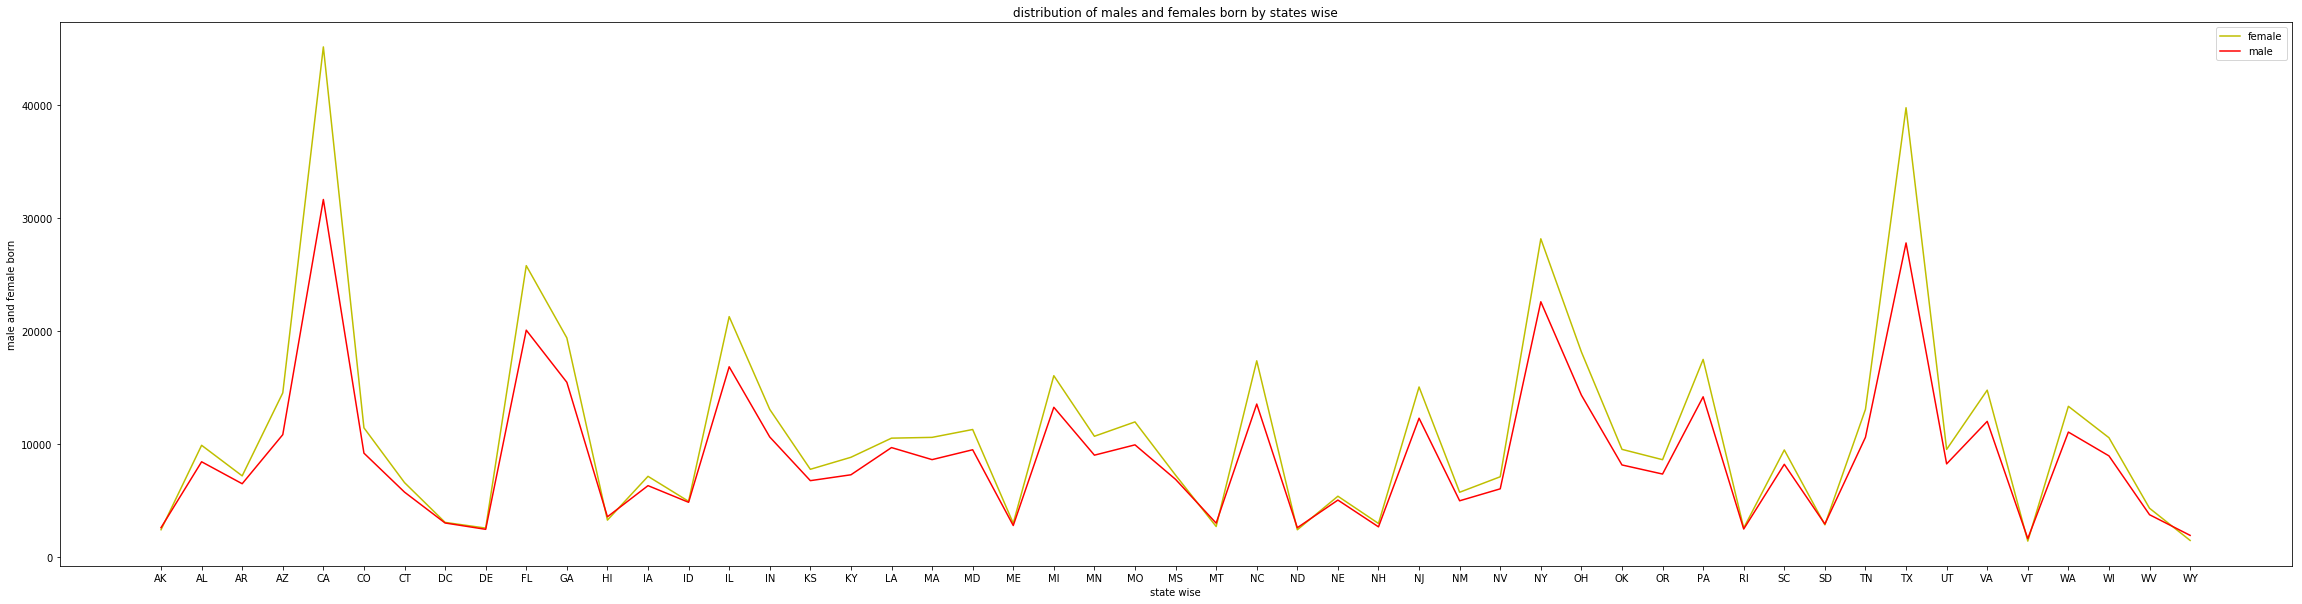

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
dat=baby_data.groupby("State").count()

df1=baby_data[baby_data["Gender"]=="F"].groupby('State').count()
df2=baby_data[baby_data["Gender"]=="M"].groupby("State").count()
x=dat.index
y1=df1["Gender"]
y2=df2["Gender"]
plt.figure(figsize=(40,10))
plt.plot(x,y1,'y',label="female")
plt.plot(x,y2,'r',label="male")
plt.xlabel("state wise")
plt.ylabel("male and female born")
plt.title("distribution of males and females born by states wise")
plt.legend()
plt.show()

In [ ]:
#TASK 2
#We have the min and max temperatures in a city In India for each months of the year. We
#would like to find a function to describe this and show it graphically, the dataset given below.
#Task:
#1. fitting it to the periodic function
#2. plot the fit


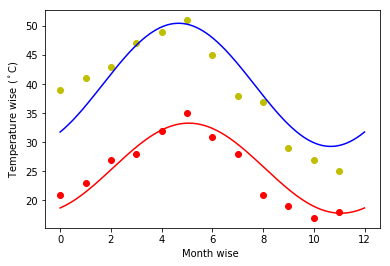

In [9]:

import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

max_temp = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
min_temp = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])
months = np.arange(12)

def temp_yearly(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(temp_yearly, months,
                                      max_temp, [20, 10, 0])
res_min, cov_min = optimize.curve_fit(temp_yearly, months,
                                      min_temp, [-40, 20, 0])

days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(months, max_temp, 'yo')
plt.plot(days, temp_yearly(days, *res_max), 'b-')
plt.plot(months, min_temp, 'ro')
plt.plot(days, temp_yearly(days, *res_min), 'r-')
plt.xlabel('Month wise ')
plt.ylabel('Temperature wise ($^\circ$C)')

plt.show()